# Model Verification

This notebook is used to verify that the model is encoded correctly according to the model conceptualisation. The verification procedures used in this notebook are taken from the [Agent based modelling for Socio-technical systems](https://www.ieeexplore.ieee.org/abstract/document/5874914/?casa_token=2LsDXcW6KKYAAAAA:4amVur3NmeHReBI3lNurs53tghVKB7vT75ju74f9WNQwBKLAeWPBvPFuXvLi4Gww2LnxFYoGNJ0)

## 1. Tracing the agent behaviour

Tracing the agent behavior was integrated into the encoding stage of the modeling. While model implementation, the agent behavior of each agent group was traced and verified with the conceptualization. The implementation is done in python using tracking variables and text prompts for agent interaction.

Example:
* Printing 'agent created' while agent initialisation
* Printing 'asset initialised' for asset initialisation
* Printing 'demand updated' when ToD is implemented and demand is revised

These tracing flags and call-outs were used at the initial stage and were eventually removed after successful implementation of the model.

## 2.Single agent testing

The single-agent testing consists of sanity checks to ensure all agent methods are functional and behave as per conceptualization.

In [1]:
import datetime
import matplotlib.pyplot as plt
from model.model_code import *

In [2]:
model = EnergyCommunity()

In [26]:
agent = Residential(unique_id=model.next_id(),
                    member_name='hh1_consumption [kWh]',
                    member_type=MemberType.CONSUMER,
                    demand_flexibility=None,
                    asset_list=None,
                    model=model)

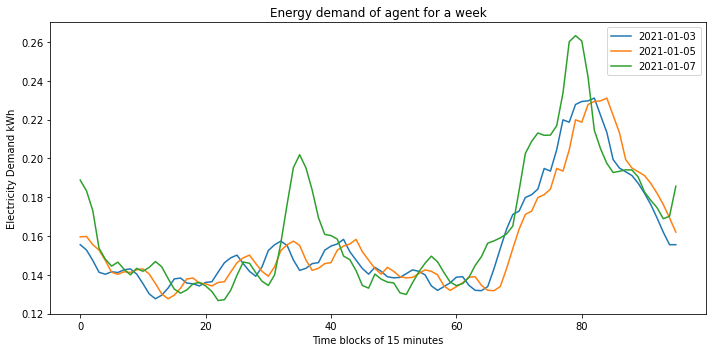

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
for i in np.arange(3):
    demand = agent.get_demand_schedule()
    date = datetime.datetime.strptime(agent.date, '%Y-%m-%d')
    date += datetime.timedelta(days=2)
    agent.date = date.strftime('%Y-%m-%d')
    ax.plot(demand.to_list(), label=agent.date)
    plt.xlabel('Time blocks of 15 minutes')
    plt.ylabel('Electricity Demand kWh')
    plt.title('Energy demand of agent for a week')
    leg = ax.legend()
    plt.tight_layout()
    plt.savefig('figures/single_agent_testing1.png', dpi=300)

As it can be seen above, the residential agent is successfully initialised. The above plot shows electricity demand of a Residential agent for 3 days.

A similar verification is carried out for the non-residential agent.

In [28]:
# Creating the agent
agent = NonResidential(unique_id=model.next_id(),
                       member_name='school_mbo',
                       member_type=MemberType.CONSUMER,
                       demand_flexibility=None,
                       asset_list=None,
                       model=model)

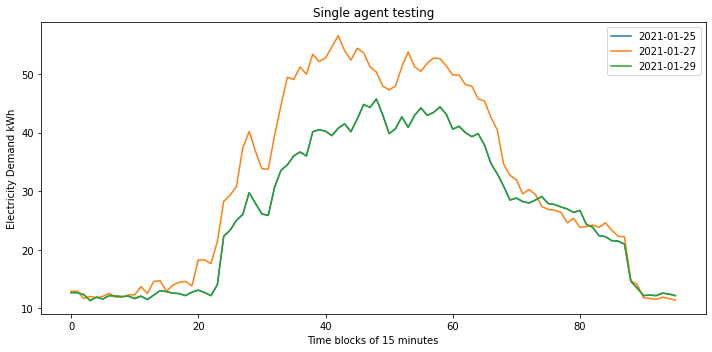

In [184]:
fig, ax = plt.subplots(figsize=(10, 5))
for i in np.arange(3):
    demand = agent.get_demand_schedule()
    date = datetime.datetime.strptime(agent.date, '%Y-%m-%d')
    date += datetime.timedelta(days=2)
    agent.date = date.strftime('%Y-%m-%d')
    ax.plot(demand.to_list(), label=agent.date)
    plt.xlabel('Time blocks of 15 minutes')
    plt.ylabel('Electricity Demand kWh')
    plt.title('Single agent testing')
    leg = ax.legend()
    plt.tight_layout()
    plt.savefig('figures/single_agent_testing2.png', dpi=300)

As it can be seen above, the non-residential agent i.e. school is successfully initialised. The above plot shows electricity demand of the agent for 3 days which represents the input demand in the model.


## 3. Interaction testing in a minimal model

The interaction testing is done by checking interaction between community members and assets

In [90]:
# Create an agent with asset
asset = [{'agent_type': Asset,
          'asset_type': Solar,
          'capacity': 10,
          'efficiency': 0.20,
          'price': 0.15}]
agent = NonResidential(unique_id=model.next_id(),
                       member_name='school_mbo',
                       member_type=MemberType.PROSUMER,
                       demand_flexibility=None,
                       asset_list=asset,
                       model=model)

In [91]:
asset = agent.assets[0]

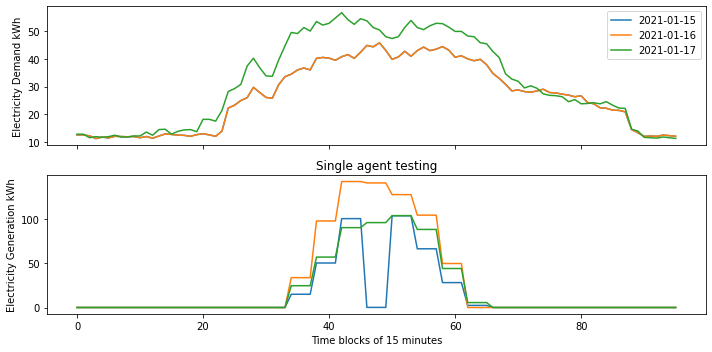

In [182]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
for i in np.arange(3):
    date = datetime.datetime.strptime(agent.date, '%Y-%m-%d')
    date += datetime.timedelta(days=1)
    agent.date = date.strftime('%Y-%m-%d')
    asset.date = agent.date
    demand = agent.get_demand_schedule()
    generation = asset.generate_supply_schedule()
    ax1.plot(demand.to_list(), label=agent.date)
    ax2.plot(generation.to_list(), label=agent.date)

    ax1.set_ylabel('Electricity Demand kWh')
    ax2.set_ylabel('Electricity Generation kWh')

    ax2.set_xlabel('Time blocks of 15 minutes')
    leg = ax1.legend()
    plt.title('Single agent testing')
    plt.tight_layout()
    plt.savefig('figures/interaction_testing.png', dpi=300)


As shown in the plots above, member agent initialised an asset agent. Plots above show the demand and generation for an agent for three different days.

## 4. Multi-agent testing

In the multi-agent testing, a minimalistic model is initialised to varify the agent interaction.

In [176]:
# initialise model
model = EnergyCommunity()

In [177]:
# model.all_agents[NonResidential] = model.all_agents[NonResidential][1:]
agent1 = model.all_agents[NonResidential][0]
agent2 = model.all_agents[NonResidential][1]
agent3 = model.all_agents[NonResidential][2]

In [178]:
model.step()

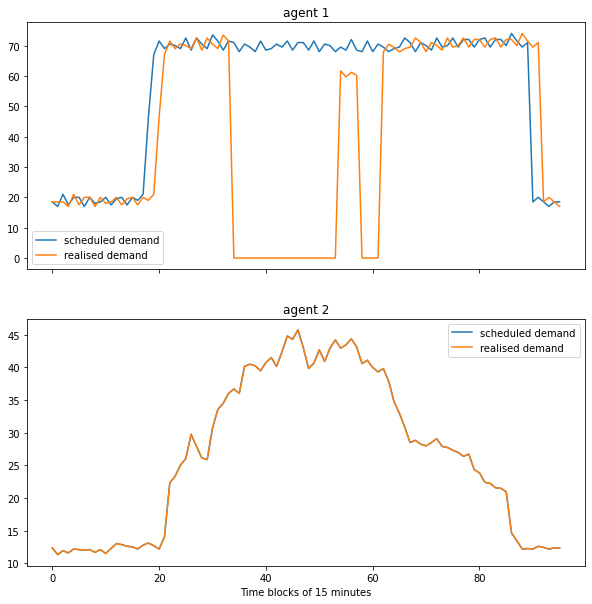

In [185]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=False)
for i in np.arange(1):
    plt.title('Multi-agent testing')
    ax1.plot(agent2.demand_schedule.to_list(), label='scheduled demand')
    ax1.plot(agent2.demand_realized.to_list(), label='realised demand')
    ax1.legend()
    ax1.set_title('agent 1')

    ax2.plot(agent3.demand_schedule.to_list(), label='scheduled demand')
    ax2.plot(agent3.demand_realized.to_list(), label='realised demand')
    ax2.legend()
    ax2.set_title('agent 2')
    ax2.set_xlabel('Time blocks of 15 minutes')
    plt.savefig('figures/multi_agent_testing.png', dpi=300)

Above graph shows demand schedule for two agents. Scheduled demand is the energy consumption by the agent whereas realised demand is the actual demand for the agent after reducing the captive generation. It can be seen that agent 1 has a generation asset whereas agent 2 does not have any generation asset. Thus, this can be concluded that the agents are interacting and behaving as per the conceptualisation in a minimalistic model setup.